In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.enable_eager_execution()
print(tf.__version__)

1.15.0


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
X, y = mnist.train.next_batch(1)

In [5]:
X

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [7]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [8]:
import matplotlib.pyplot as plt

In [9]:
X.shape

(1, 784)

In [10]:
X.reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

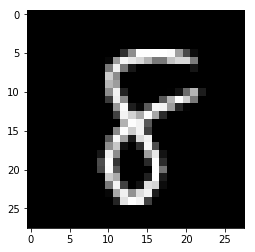

In [16]:
plt.imshow(X.reshape(28, 28),
           cmap = "gray")
plt.show()

In [17]:
# X.reshape(샘플 1개, 가로 28, 세로 28, RGB 채널개수 1)
X.reshape(1,28,28,1)

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [19]:
X = X.reshape(1,28,28,1)
X.shape

(1, 28, 28, 1)

In [20]:
# 여기에 곱해질 필터를 하나 만들거임
# tensorflow 가 알아서 cost가 0이 되도록(그림이 선명해지도록) 값을 곱해준다
initializer = tf.contrib.layers.xavier_initializer()

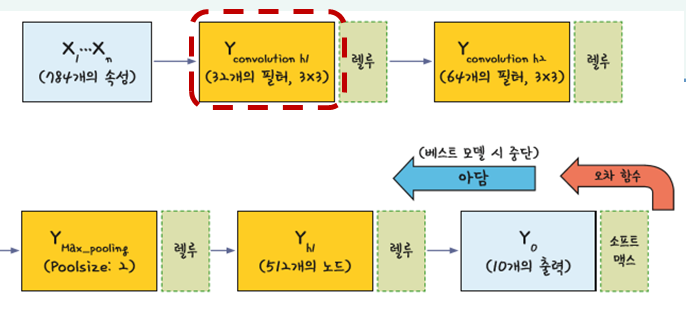

In [21]:
# 줄, 칸, 흑백, 필터개수
# 3, 3, 1, 32 : 강의자료에 32개 필터, 3 X 3 이라고 했음
w1 = tf.Variable(initializer([3, 3, 1, 32]))
w1

<tf.Variable 'Variable:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.50269419e-02, -1.30282566e-01, -1.32024884e-01,
           1.25140414e-01, -3.25292721e-02, -1.14010170e-01,
          -5.16171977e-02, -1.51634961e-02, -1.13249265e-01,
           5.73855788e-02,  5.35726696e-02, -1.21880434e-01,
          -1.04095235e-01, -1.47161186e-02, -3.67420837e-02,
           8.34934711e-02, -8.99685919e-03,  6.36009574e-02,
          -5.14837205e-02, -1.36842072e-01,  6.09208345e-02,
           1.62391514e-02,  9.39249694e-02, -2.21715420e-02,
          -2.01331079e-03,  5.21902740e-02, -1.29542097e-01,
           3.81685346e-02, -1.09606475e-01,  6.23245835e-02,
           5.78616560e-03,  1.28056094e-01]],

        [[-7.56871104e-02, -7.70478919e-02,  1.27449855e-01,
          -5.28260320e-02, -1.05584621e-01, -4.64616120e-02,
          -1.35096505e-01, -1.89520419e-02,  2.63736099e-02,
           1.13750651e-01,  2.80309618e-02, -3.56142744e-02,
           1.13830164e-01,  1.2

In [22]:
convolution_h1 = tf.nn.conv2d(X, w1, strides = 1, padding = "SAME")
convolution_h1

<tf.Tensor: id=18, shape=(1, 28, 28, 32), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0.

In [23]:
convolution_h1 = tf.nn.relu(convolution_h1)
convolution_h1

<tf.Tensor: id=19, shape=(1, 28, 28, 32), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0.

In [24]:
# 가중치 (필터)를 선언
w2 = tf.Variable(initializer([3, 3, 32, 64]))
w2

<tf.Variable 'Variable:0' shape=(3, 3, 32, 64) dtype=float32, numpy=
array([[[[-0.01035693,  0.06863717, -0.06511045, ...,  0.05772711,
          -0.00620691, -0.01487982],
         [ 0.0683377 ,  0.07015833, -0.04557977, ..., -0.0649991 ,
           0.00915001,  0.08113126],
         [ 0.01866052,  0.01204161, -0.01972231, ..., -0.01039811,
          -0.08239637,  0.07615847],
         ...,
         [-0.06139934, -0.02497137,  0.06822594, ..., -0.04712562,
           0.06352619,  0.02345011],
         [ 0.01692688, -0.03287445,  0.05443416, ...,  0.07855102,
           0.03456595, -0.06458481],
         [-0.07070148, -0.07593445, -0.06286985, ..., -0.03038039,
           0.06799219,  0.03785845]],

        [[ 0.06129206,  0.06133839, -0.01642831, ..., -0.00982118,
           0.07966156,  0.01882923],
         [-0.06286683,  0.0820163 , -0.02154293, ...,  0.01265889,
          -0.05940294, -0.08237468],
         [ 0.07052351, -0.06145658,  0.04446954, ...,  0.07568244,
           0.043

In [25]:
convolution_h2 = tf.nn.conv2d(convolution_h1, w2, strides = 1, padding = "SAME")
convolution_h2

<tf.Tensor: id=36, shape=(1, 28, 28, 64), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0.

In [26]:
convolution_h2 = tf.nn.relu(convolution_h2)
convolution_h2

<tf.Tensor: id=37, shape=(1, 28, 28, 64), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0.

In [27]:
convolution_h2.shape

TensorShape([Dimension(1), Dimension(28), Dimension(28), Dimension(64)])

In [28]:
convolution_h2 = tf.nn.max_pool(convolution_h2, ksize = 2, strides = 2, padding = 'SAME')
convolution_h2

<tf.Tensor: id=38, shape=(1, 14, 14, 64), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.00245665, 0.

In [29]:
convolution_h2.shape

TensorShape([Dimension(1), Dimension(14), Dimension(14), Dimension(64)])

In [30]:
w3 = tf.Variable(initializer([14 *14 * 64, 256]))
w3

<tf.Variable 'Variable:0' shape=(12544, 256) dtype=float32, numpy=
array([[ 0.00158321, -0.01501167, -0.01936642, ...,  0.00106773,
         0.00164439, -0.01671366],
       [ 0.01375624,  0.02109303, -0.01235993, ...,  0.01012558,
         0.01141652, -0.00358814],
       [ 0.00986819, -0.01895006,  0.01546223, ...,  0.01782267,
         0.01029229, -0.00728672],
       ...,
       [ 0.00708207, -0.00793698,  0.0024731 , ..., -0.00678979,
         0.00639098, -0.00848781],
       [ 0.01788871, -0.01013932, -0.02062741, ..., -0.00555989,
         0.0024787 ,  0.01219032],
       [-0.0106456 ,  0.0134776 , -0.01572457, ..., -0.00398047,
        -0.01991366, -0.00048684]], dtype=float32)>

In [31]:
w3.shape

TensorShape([Dimension(12544), Dimension(256)])

In [32]:
convolution_h2.shape

TensorShape([Dimension(1), Dimension(14), Dimension(14), Dimension(64)])

In [33]:
convolution_h2 = tf.reshape(convolution_h2, [-1, 14 * 14 * 64])
convolution_h2

<tf.Tensor: id=55, shape=(1, 12544), dtype=float32, numpy=array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [34]:
convolution_h2.shape

TensorShape([Dimension(1), Dimension(12544)])

In [35]:
y_h1 = tf.matmul(convolution_h2, w3)
y_h1

<tf.Tensor: id=57, shape=(1, 256), dtype=float32, numpy=
array([[-0.02052319,  0.05224422, -0.01347539, -0.0410964 ,  0.05545769,
         0.01112101, -0.06961008,  0.03974654, -0.05697258,  0.04493456,
         0.05097353,  0.02025485, -0.02040267, -0.06598815,  0.00479791,
         0.04138899, -0.03623386,  0.0597932 ,  0.04722816, -0.01332521,
         0.03192742,  0.05812176, -0.04923109,  0.02389824, -0.00604835,
        -0.08668824, -0.02765665, -0.0144285 , -0.03292809,  0.0151033 ,
        -0.06000884, -0.0457748 ,  0.03750299,  0.05330262,  0.0948344 ,
        -0.02854017,  0.01843812, -0.01830528, -0.06436433,  0.05526   ,
         0.02257575,  0.00780693,  0.00206157, -0.05009856, -0.03129015,
         0.00403665,  0.01776868,  0.03918578,  0.08238916,  0.03469441,
         0.02768232,  0.04023423, -0.0131274 , -0.03871413, -0.0507672 ,
        -0.00340002, -0.06313868, -0.02218114,  0.0195777 ,  0.03100354,
        -0.05734443,  0.00928155, -0.04877771,  0.03062885,  0.0369

In [36]:
y_h1.shape

TensorShape([Dimension(1), Dimension(256)])

p.107 진행중